In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_userwithdraw.parquet'

# 데이터 불러오기
userwithdraw_df = pd.read_parquet(gcs_path, engine='pyarrow')
userwithdraw_df

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
...,...,...,...
70759,70889,기타 이유,2024-05-08 14:24:16
70760,70890,함께 할 친구가 없어서,2024-05-08 15:20:06
70761,70891,재밌는 질문이 없어서,2024-05-08 15:46:36
70762,70892,기타 이유,2024-05-09 08:29:09


In [3]:
userwithdraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
userwithdraw_df.isnull().sum()

id            0
reason        0
created_at    0
dtype: int64

In [5]:
userwithdraw_df.describe(include='all')

,id,reason,created_at
count,70764.000000,70764,70764
unique,NaN,8,NaN
top,NaN,기타 이유,NaN
freq,NaN,40301,NaN
mean,35499.063154,NaN,2023-06-12 06:34:26.762464
min,42.000000,NaN,2023-03-29 13:22:12
25%,17803.750000,NaN,2023-05-12 06:28:54.249999872
50%,35498.500000,NaN,2023-05-20 15:50:53.500000
75%,53199.250000,NaN,2023-06-14 12:13:03.500000
max,70893.000000,NaN,2024-05-09 08:49:06


In [6]:
# 완전 중복 행 확인
duplicate_rows = userwithdraw_df[userwithdraw_df.duplicated()]
print(f"완전 중복 행 수: {len(duplicate_rows)}")

# 특정 key 기준 중복 (예: id 기준)
duplicate_ids = userwithdraw_df[userwithdraw_df.duplicated(subset='id')]
print(f"id 기준 중복 수: {len(duplicate_ids)}")

완전 중복 행 수: 0
id 기준 중복 수: 0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '기타 이유'),
  Text(1, 0, '함께 할 친구가 없어서'),
  Text(2, 0, '재밌는 질문이 없어서'),
  Text(3, 0, '버그가 너무 많아서'),
  Text(4, 0, '구독료가 너무 비싸서'),
  Text(5, 0, 'admin'),
  Text(6, 0, 'test'),
  Text(7, 0, '기타')])

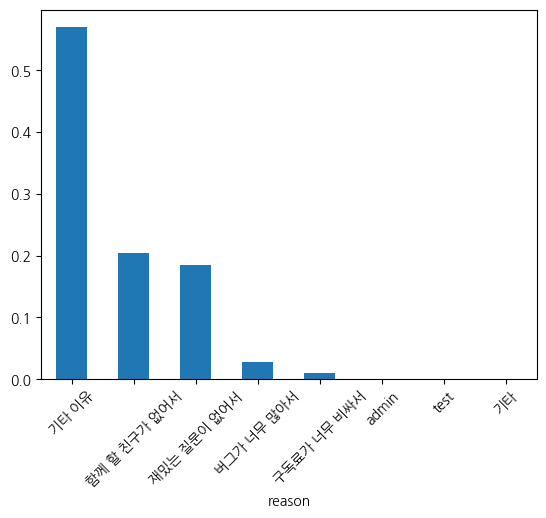

In [8]:
userwithdraw_df['reason'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=45)

#### 날짜 파싱 및 탈퇴 시점 분석

/home/eunyu/.local/lib/python3.12/site-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


ConversionError: Failed to convert value(s) to axis units: array([datetime.date(2023, 3, 29), datetime.date(2023, 3, 30),
       datetime.date(2023, 3, 31), datetime.date(2023, 4, 1),
       datetime.date(2023, 4, 2), datetime.date(2023, 4, 3),
       datetime.date(2023, 4, 4), datetime.date(2023, 4, 7),
       datetime.date(2023, 4, 8), datetime.date(2023, 4, 9),
       datetime.date(2023, 4, 10), datetime.date(2023, 4, 11),
       datetime.date(2023, 4, 13), datetime.date(2023, 4, 15),
       datetime.date(2023, 4, 17), datetime.date(2023, 4, 19),
       datetime.date(2023, 4, 20), datetime.date(2023, 4, 21),
       datetime.date(2023, 4, 22), datetime.date(2023, 4, 23),
       datetime.date(2023, 4, 24), datetime.date(2023, 4, 25),
       datetime.date(2023, 4, 26), datetime.date(2023, 4, 27),
       datetime.date(2023, 4, 28), datetime.date(2023, 4, 29),
       datetime.date(2023, 4, 30), datetime.date(2023, 5, 1),
       datetime.date(2023, 5, 2), datetime.date(2023, 5, 3),
       datetime.date(2023, 5, 4), datetime.date(2023, 5, 5),
       datetime.date(2023, 5, 6), datetime.date(2023, 5, 7),
       datetime.date(2023, 5, 8), datetime.date(2023, 5, 9),
       datetime.date(2023, 5, 10), datetime.date(2023, 5, 11),
       datetime.date(2023, 5, 12), datetime.date(2023, 5, 13),
       datetime.date(2023, 5, 14), datetime.date(2023, 5, 15),
       datetime.date(2023, 5, 16), datetime.date(2023, 5, 17),
       datetime.date(2023, 5, 18), datetime.date(2023, 5, 19),
       datetime.date(2023, 5, 20), datetime.date(2023, 5, 21),
       datetime.date(2023, 5, 22), datetime.date(2023, 5, 23),
       datetime.date(2023, 5, 24), datetime.date(2023, 5, 25),
       datetime.date(2023, 5, 26), datetime.date(2023, 5, 27),
       datetime.date(2023, 5, 28), datetime.date(2023, 5, 29),
       datetime.date(2023, 5, 30), datetime.date(2023, 5, 31),
       datetime.date(2023, 6, 1), datetime.date(2023, 6, 2),
       datetime.date(2023, 6, 3), datetime.date(2023, 6, 4),
       datetime.date(2023, 6, 5), datetime.date(2023, 6, 6),
       datetime.date(2023, 6, 7), datetime.date(2023, 6, 8),
       datetime.date(2023, 6, 9), datetime.date(2023, 6, 10),
       datetime.date(2023, 6, 11), datetime.date(2023, 6, 12),
       datetime.date(2023, 6, 13), datetime.date(2023, 6, 14),
       datetime.date(2023, 6, 15), datetime.date(2023, 6, 16),
       datetime.date(2023, 6, 17), datetime.date(2023, 6, 18),
       datetime.date(2023, 6, 19), datetime.date(2023, 6, 20),
       datetime.date(2023, 6, 21), datetime.date(2023, 6, 22),
       datetime.date(2023, 6, 23), datetime.date(2023, 6, 24),
       datetime.date(2023, 6, 25), datetime.date(2023, 6, 26),
       datetime.date(2023, 6, 27), datetime.date(2023, 6, 28),
       datetime.date(2023, 6, 29), datetime.date(2023, 6, 30),
       datetime.date(2023, 7, 1), datetime.date(2023, 7, 2),
       datetime.date(2023, 7, 3), datetime.date(2023, 7, 4),
       datetime.date(2023, 7, 5), datetime.date(2023, 7, 6),
       datetime.date(2023, 7, 7), datetime.date(2023, 7, 8),
       datetime.date(2023, 7, 9), datetime.date(2023, 7, 10),
       datetime.date(2023, 7, 11), datetime.date(2023, 7, 12),
       datetime.date(2023, 7, 13), datetime.date(2023, 7, 14),
       datetime.date(2023, 7, 15), datetime.date(2023, 7, 16),
       datetime.date(2023, 7, 17), datetime.date(2023, 7, 18),
       datetime.date(2023, 7, 19), datetime.date(2023, 7, 20),
       datetime.date(2023, 7, 21), datetime.date(2023, 7, 22),
       datetime.date(2023, 7, 23), datetime.date(2023, 7, 24),
       datetime.date(2023, 7, 25), datetime.date(2023, 7, 26),
       datetime.date(2023, 7, 27), datetime.date(2023, 7, 28),
       datetime.date(2023, 7, 29), datetime.date(2023, 7, 30),
       datetime.date(2023, 7, 31), datetime.date(2023, 8, 1),
       datetime.date(2023, 8, 2), datetime.date(2023, 8, 3),
       datetime.date(2023, 8, 4), datetime.date(2023, 8, 5),
       datetime.date(2023, 8, 6), datetime.date(2023, 8, 7),
       datetime.date(2023, 8, 8), datetime.date(2023, 8, 9),
       datetime.date(2023, 8, 10), datetime.date(2023, 8, 11),
       datetime.date(2023, 8, 12), datetime.date(2023, 8, 13),
       datetime.date(2023, 8, 14), datetime.date(2023, 8, 15),
       datetime.date(2023, 8, 16), datetime.date(2023, 8, 17),
       datetime.date(2023, 8, 18), datetime.date(2023, 8, 19),
       datetime.date(2023, 8, 20), datetime.date(2023, 8, 21),
       datetime.date(2023, 8, 22), datetime.date(2023, 8, 23),
       datetime.date(2023, 8, 24), datetime.date(2023, 8, 25),
       datetime.date(2023, 8, 26), datetime.date(2023, 8, 27),
       datetime.date(2023, 8, 28), datetime.date(2023, 8, 29),
       datetime.date(2023, 8, 30), datetime.date(2023, 8, 31),
       datetime.date(2023, 9, 1), datetime.date(2023, 9, 2),
       datetime.date(2023, 9, 3), datetime.date(2023, 9, 4),
       datetime.date(2023, 9, 5), datetime.date(2023, 9, 6),
       datetime.date(2023, 9, 7), datetime.date(2023, 9, 8),
       datetime.date(2023, 9, 9), datetime.date(2023, 9, 10),
       datetime.date(2023, 9, 11), datetime.date(2023, 9, 12),
       datetime.date(2023, 9, 13), datetime.date(2023, 9, 14),
       datetime.date(2023, 9, 15), datetime.date(2023, 9, 16),
       datetime.date(2023, 9, 17), datetime.date(2023, 9, 18),
       datetime.date(2023, 9, 19), datetime.date(2023, 9, 20),
       datetime.date(2023, 9, 21), datetime.date(2023, 9, 22),
       datetime.date(2023, 9, 23), datetime.date(2023, 9, 24),
       datetime.date(2023, 9, 25), datetime.date(2023, 9, 26),
       datetime.date(2023, 9, 27), datetime.date(2023, 9, 28),
       datetime.date(2023, 9, 29), datetime.date(2023, 9, 30),
       datetime.date(2023, 10, 1), datetime.date(2023, 10, 2),
       datetime.date(2023, 10, 3), datetime.date(2023, 10, 4),
       datetime.date(2023, 10, 5), datetime.date(2023, 10, 6),
       datetime.date(2023, 10, 7), datetime.date(2023, 10, 8),
       datetime.date(2023, 10, 9), datetime.date(2023, 10, 10),
       datetime.date(2023, 10, 11), datetime.date(2023, 10, 12),
       datetime.date(2023, 10, 13), datetime.date(2023, 10, 14),
       datetime.date(2023, 10, 15), datetime.date(2023, 10, 16),
       datetime.date(2023, 10, 17), datetime.date(2023, 10, 18),
       datetime.date(2023, 10, 19), datetime.date(2023, 10, 20),
       datetime.date(2023, 10, 21), datetime.date(2023, 10, 22),
       datetime.date(2023, 10, 23), datetime.date(2023, 10, 24),
       datetime.date(2023, 10, 25), datetime.date(2023, 10, 26),
       datetime.date(2023, 10, 27), datetime.date(2023, 10, 28),
       datetime.date(2023, 10, 29), datetime.date(2023, 10, 30),
       datetime.date(2023, 10, 31), datetime.date(2023, 11, 1),
       datetime.date(2023, 11, 2), datetime.date(2023, 11, 3),
       datetime.date(2023, 11, 4), datetime.date(2023, 11, 5),
       datetime.date(2023, 11, 6), datetime.date(2023, 11, 7),
       datetime.date(2023, 11, 8), datetime.date(2023, 11, 9),
       datetime.date(2023, 11, 10), datetime.date(2023, 11, 11),
       datetime.date(2023, 11, 12), datetime.date(2023, 11, 13),
       datetime.date(2023, 11, 14), datetime.date(2023, 11, 15),
       datetime.date(2023, 11, 16), datetime.date(2023, 11, 17),
       datetime.date(2023, 11, 18), datetime.date(2023, 11, 19),
       datetime.date(2023, 11, 20), datetime.date(2023, 11, 21),
       datetime.date(2023, 11, 22), datetime.date(2023, 11, 23),
       datetime.date(2023, 11, 24), datetime.date(2023, 11, 25),
       datetime.date(2023, 11, 26), datetime.date(2023, 11, 27),
       datetime.date(2023, 11, 28), datetime.date(2023, 11, 29),
       datetime.date(2023, 11, 30), datetime.date(2023, 12, 1),
       datetime.date(2023, 12, 2), datetime.date(2023, 12, 3),
       datetime.date(2023, 12, 4), datetime.date(2023, 12, 5),
       datetime.date(2023, 12, 6), datetime.date(2023, 12, 7),
       datetime.date(2023, 12, 8), datetime.date(2023, 12, 9),
       datetime.date(2023, 12, 10), datetime.date(2023, 12, 11),
       datetime.date(2023, 12, 12), datetime.date(2023, 12, 13),
       datetime.date(2023, 12, 14), datetime.date(2023, 12, 15),
       datetime.date(2023, 12, 16), datetime.date(2023, 12, 17),
       datetime.date(2023, 12, 18), datetime.date(2023, 12, 19),
       datetime.date(2023, 12, 20), datetime.date(2023, 12, 21),
       datetime.date(2023, 12, 22), datetime.date(2023, 12, 23),
       datetime.date(2023, 12, 24), datetime.date(2023, 12, 25),
       datetime.date(2023, 12, 26), datetime.date(2023, 12, 27),
       datetime.date(2023, 12, 28), datetime.date(2023, 12, 29),
       datetime.date(2023, 12, 30), datetime.date(2023, 12, 31),
       datetime.date(2024, 1, 1), datetime.date(2024, 1, 2),
       datetime.date(2024, 1, 3), datetime.date(2024, 1, 4),
       datetime.date(2024, 1, 5), datetime.date(2024, 1, 6),
       datetime.date(2024, 1, 7), datetime.date(2024, 1, 8),
       datetime.date(2024, 1, 9), datetime.date(2024, 1, 10),
       datetime.date(2024, 1, 11), datetime.date(2024, 1, 12),
       datetime.date(2024, 1, 13), datetime.date(2024, 1, 14),
       datetime.date(2024, 1, 15), datetime.date(2024, 1, 16),
       datetime.date(2024, 1, 17), datetime.date(2024, 1, 18),
       datetime.date(2024, 1, 19), datetime.date(2024, 1, 20),
       datetime.date(2024, 1, 21), datetime.date(2024, 1, 22),
       datetime.date(2024, 1, 23), datetime.date(2024, 1, 24),
       datetime.date(2024, 1, 25), datetime.date(2024, 1, 26),
       datetime.date(2024, 1, 27), datetime.date(2024, 1, 28),
       datetime.date(2024, 1, 29), datetime.date(2024, 1, 30),
       datetime.date(2024, 1, 31), datetime.date(2024, 2, 1),
       datetime.date(2024, 2, 2), datetime.date(2024, 2, 3),
       datetime.date(2024, 2, 4), datetime.date(2024, 2, 5),
       datetime.date(2024, 2, 6), datetime.date(2024, 2, 7),
       datetime.date(2024, 2, 8), datetime.date(2024, 2, 9),
       datetime.date(2024, 2, 10), datetime.date(2024, 2, 11),
       datetime.date(2024, 2, 12), datetime.date(2024, 2, 13),
       datetime.date(2024, 2, 14), datetime.date(2024, 2, 15),
       datetime.date(2024, 2, 16), datetime.date(2024, 2, 17),
       datetime.date(2024, 2, 18), datetime.date(2024, 2, 19),
       datetime.date(2024, 2, 20), datetime.date(2024, 2, 21),
       datetime.date(2024, 2, 22), datetime.date(2024, 2, 23),
       datetime.date(2024, 2, 24), datetime.date(2024, 2, 25),
       datetime.date(2024, 2, 26), datetime.date(2024, 2, 27),
       datetime.date(2024, 2, 28), datetime.date(2024, 2, 29),
       datetime.date(2024, 3, 1), datetime.date(2024, 3, 2),
       datetime.date(2024, 3, 3), datetime.date(2024, 3, 4),
       datetime.date(2024, 3, 5), datetime.date(2024, 3, 6),
       datetime.date(2024, 3, 7), datetime.date(2024, 3, 8),
       datetime.date(2024, 3, 9), datetime.date(2024, 3, 10),
       datetime.date(2024, 3, 11), datetime.date(2024, 3, 13),
       datetime.date(2024, 3, 14), datetime.date(2024, 3, 15),
       datetime.date(2024, 3, 16), datetime.date(2024, 3, 17),
       datetime.date(2024, 3, 18), datetime.date(2024, 3, 19),
       datetime.date(2024, 3, 20), datetime.date(2024, 3, 21),
       datetime.date(2024, 3, 22), datetime.date(2024, 3, 23),
       datetime.date(2024, 3, 24), datetime.date(2024, 3, 25),
       datetime.date(2024, 3, 26), datetime.date(2024, 3, 27),
       datetime.date(2024, 3, 28), datetime.date(2024, 3, 29),
       datetime.date(2024, 3, 30), datetime.date(2024, 3, 31),
       datetime.date(2024, 4, 1), datetime.date(2024, 4, 2),
       datetime.date(2024, 4, 3), datetime.date(2024, 4, 4),
       datetime.date(2024, 4, 5), datetime.date(2024, 4, 6),
       datetime.date(2024, 4, 7), datetime.date(2024, 4, 8),
       datetime.date(2024, 4, 9), datetime.date(2024, 4, 10),
       datetime.date(2024, 4, 11), datetime.date(2024, 4, 12),
       datetime.date(2024, 4, 13), datetime.date(2024, 4, 14),
       datetime.date(2024, 4, 15), datetime.date(2024, 4, 16),
       datetime.date(2024, 4, 17), datetime.date(2024, 4, 18),
       datetime.date(2024, 4, 19), datetime.date(2024, 4, 20),
       datetime.date(2024, 4, 21), datetime.date(2024, 4, 22),
       datetime.date(2024, 4, 23), datetime.date(2024, 4, 24),
       datetime.date(2024, 4, 25), datetime.date(2024, 4, 26),
       datetime.date(2024, 4, 27), datetime.date(2024, 4, 28),
       datetime.date(2024, 4, 29), datetime.date(2024, 4, 30),
       datetime.date(2024, 5, 1), datetime.date(2024, 5, 2),
       datetime.date(2024, 5, 3), datetime.date(2024, 5, 4),
       datetime.date(2024, 5, 5), datetime.date(2024, 5, 6),
       datetime.date(2024, 5, 7), datetime.date(2024, 5, 8),
       datetime.date(2024, 5, 9)], dtype=object)

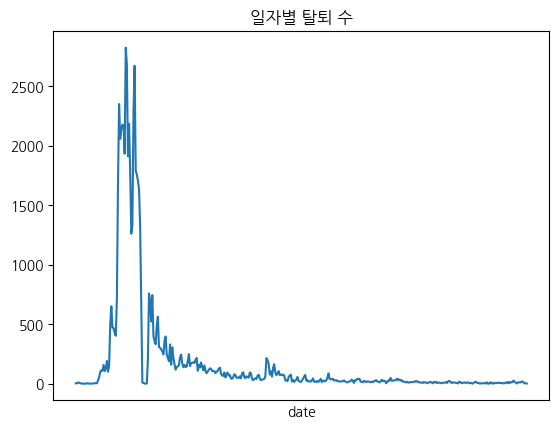

In [9]:
userwithdraw_df['created_at'] = pd.to_datetime(userwithdraw_df['created_at'])
userwithdraw_df['date'] = userwithdraw_df['created_at'].dt.date
userwithdraw_df['weekday'] = userwithdraw_df['created_at'].dt.day_name()

# 일자별 탈퇴 수
userwithdraw_df['date'].value_counts().sort_index().plot(title="일자별 탈퇴 수")

# 요일별 탈퇴 수
sns.countplot(data=userwithdraw_df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
